In [1]:
import itertools

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

import bioframe as bf
import bioframe.viz

# Example interval sets

In [2]:
df1 = pd.DataFrame([
    ['chr1', 1, 5],
    ['chr1', 3, 8],
    ['chr1', 8, 10],
    ['chr1', 12, 14]],
    columns=['chrom', 'start', 'end']
)

df2 = pd.DataFrame([
    ['chr1', 4, 8],
    ['chr1', 10, 11]],
    columns=['chrom', 'start', 'end']
)

(-0.5, 14.5)

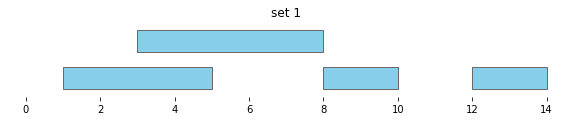

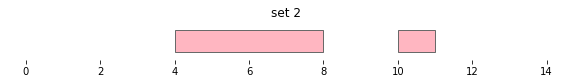

In [3]:
bf.viz.plot_intervals(df1, show_coords=True)
plt.title('set 1')

bf.viz.plot_intervals(df2, show_coords=True, colors='lightpink')
plt.title('set 2')
plt.xlim(-0.5,14.5)

# Overlap

In [4]:
overlapping_intervals = bf.overlap(df1, df2)
display(overlapping_intervals)

,chrom_1,start_1,end_1,chrom_2,start_2,end_2,overlap_start,overlap_end
0,chr1,1,5,chr1,4,8,4,5
1,chr1,3,8,chr1,4,8,4,8


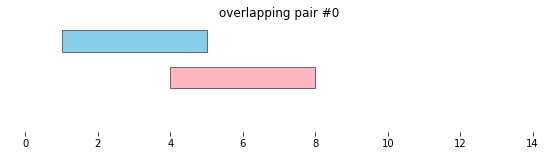

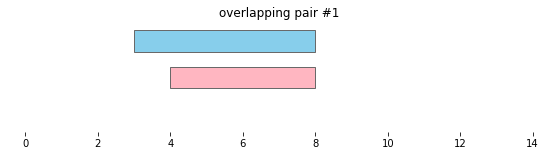

In [5]:
for i, reg_pair in overlapping_intervals.iterrows(): 
    bf.viz.plot_intervals_arr(
        starts = [reg_pair.start_1,reg_pair.start_2],
        ends = [reg_pair.end_1,reg_pair.end_2],
        colors = ['skyblue', 'lightpink'],
        levels = [2,1],
        xlim = (-0.5,14.5),
        show_coords = True)
    plt.title(f'overlapping pair #{i}')

# Merge

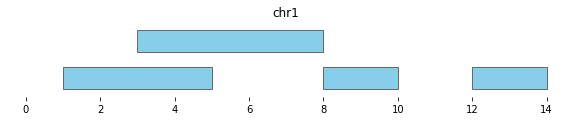

In [6]:
df1 = pd.DataFrame([
    ['chr1', 1, 5],
    ['chr1', 3, 8],
    ['chr1', 8, 10],
    ['chr1', 12, 14],
    ],
    columns=['chrom', 'start', 'end']
)

bf.viz.plot_intervals(df1, show_coords=True)

,chrom,start,end,cluster
0,chr1,1,5,0
1,chr1,3,8,0
2,chr1,8,10,0
3,chr1,12,14,1


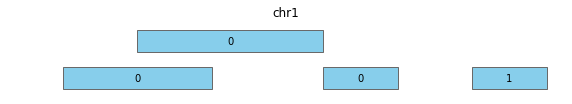

In [7]:
df_annotated, df_merged = bf.merge(df1, min_dist=0)
display(df_annotated)
bf.viz.plot_intervals(df_annotated, labels=df_annotated['cluster'])

,chrom,start,end,n_intervals
0,chr1,1,10,3
1,chr1,12,14,1


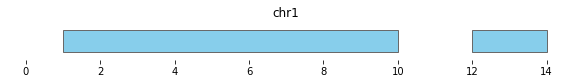

In [8]:
display(df_merged)
bf.viz.plot_intervals(df_merged, show_coords=True)

,chrom,start,end,cluster
0,chr1,1,5,0
1,chr1,3,8,0
2,chr1,8,10,1
3,chr1,12,14,2


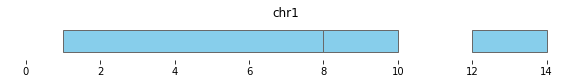

In [9]:
df_annotated, df_merged = bf.merge(df1, min_dist=None)
display(df_annotated)
bf.viz.plot_intervals(df_merged, show_coords=True)

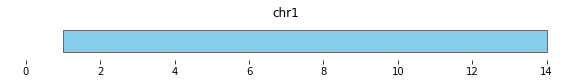

In [10]:
df_annotated, df_merged = bf.merge(df1, min_dist=2)
bf.viz.plot_intervals(df_merged, show_coords=True)

# Complement

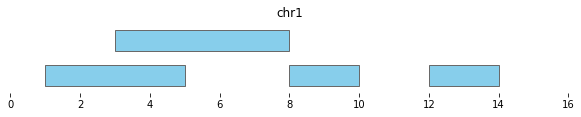

In [11]:
bf.viz.plot_intervals(df1, show_coords=True, xlim=(0,16))

In [12]:
df_complemented = bf.complement(df1)
display(df_complemented)

,chrom,start,end
0,chr1,0,1
1,chr1,10,12
2,chr1,14,9223372036854775807


,chrom,start,end
0,chr1,0,1
1,chr1,10,12
2,chr1,14,16


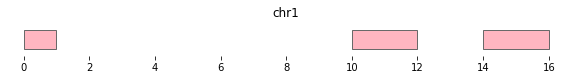

In [13]:
df_complemented = bf.complement(df1, chromsizes={'chr1':16})
display(df_complemented)
bf.viz.plot_intervals(df_complemented, show_coords=True, colors='lightpink')

# Closest

In [14]:
bf.closest(df1, df2)

,chrom_1,start_1,end_1,chrom_2,start_2,end_2,distance
0,chr1,1,5,chr1,4,8,0
1,chr1,3,8,chr1,4,8,0
2,chr1,8,10,chr1,4,8,0
3,chr1,12,14,chr1,10,11,1


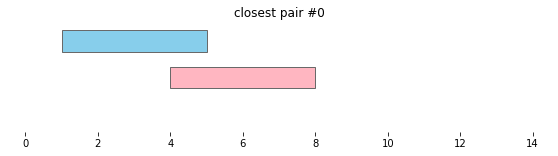

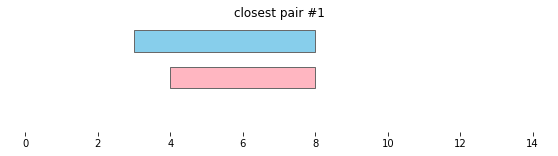

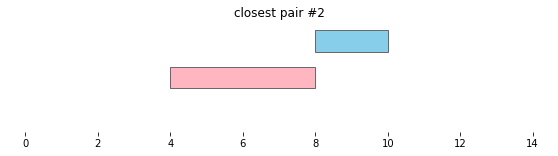

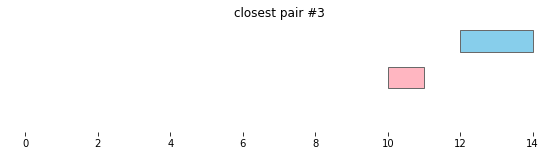

In [15]:
closest_intervals = bf.closest(df1, df2)
for i, reg_pair in closest_intervals.iterrows(): 
    bf.viz.plot_intervals_arr(
        starts = [reg_pair.start_1,reg_pair.start_2],
        ends = [reg_pair.end_1,reg_pair.end_2],
        colors = ['skyblue', 'lightpink'],
        levels = [2,1],
        xlim = (-0.5,14.5),
        show_coords = True)
    plt.title(f'closest pair #{i}')

In [16]:
bf.closest(df1, df1, k=2)

,chrom_1,start_1,end_1,chrom_2,start_2,end_2,distance
0,chr1,1,5,chr1,3,8,0
1,chr1,1,5,chr1,8,10,3
2,chr1,3,8,chr1,1,5,0
3,chr1,3,8,chr1,8,10,0
4,chr1,8,10,chr1,3,8,0
5,chr1,8,10,chr1,12,14,2
6,chr1,12,14,chr1,8,10,2
7,chr1,12,14,chr1,3,8,4


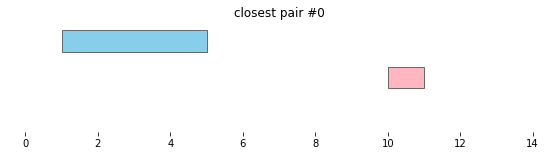

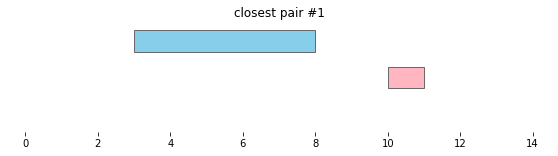

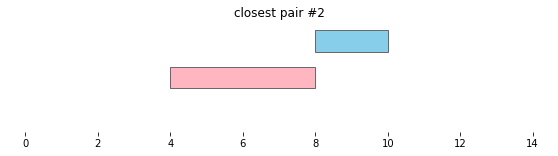

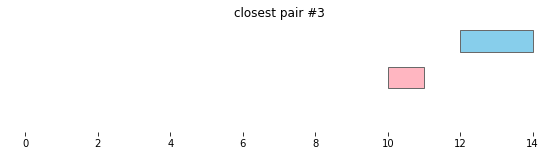

In [17]:
closest_intervals = bf.closest(df1, df2, ignore_overlaps=True)
for i, reg_pair in closest_intervals.iterrows(): 
    bf.viz.plot_intervals_arr(
        starts = [reg_pair.start_1,reg_pair.start_2],
        ends = [reg_pair.end_1,reg_pair.end_2],
        colors = ['skyblue', 'lightpink'],
        levels = [2,1],
        xlim = (-0.5,14.5),
        show_coords = True)
    plt.title(f'closest pair #{i}')

In [18]:
bf.closest(df1, df1)

,chrom_1,start_1,end_1,chrom_2,start_2,end_2,distance
0,chr1,1,5,chr1,3,8,0
1,chr1,3,8,chr1,1,5,0
2,chr1,8,10,chr1,3,8,0
3,chr1,12,14,chr1,8,10,2


# Coverage

In [19]:
bf.coverage(df1, df2)

,chrom,start,end,coverage,n_overlaps
0,chr1,1,5,1,1
1,chr1,3,8,4,1
2,chr1,8,10,0,0
3,chr1,12,14,0,0


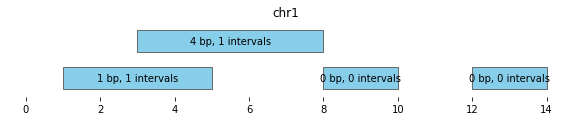

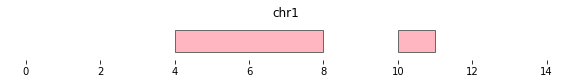

In [20]:
df1_coverage = bf.coverage(df1, df2)
bf.viz.plot_intervals(
    df1_coverage, 
    show_coords=True, 
    labels = [f'{cov} bp, {n} intervals' 
              for cov, n in zip(df1_coverage.coverage, df1_coverage['n_overlaps'])])
bf.viz.plot_intervals(df2, show_coords=True, colors='lightpink', xlim=(-0.5,14.5))
